In [4]:
import pandas as pd
import os

data_path = r"D:\Learning\data analyst" 
# 2. Check what files are inside that folder
print("Files in folder:", os.listdir(data_path))
# 3. Load the data (make sure the filename matches what's printed above)
# Usually for this dataset, it is 'twitter_airline_sentiment_clean.csv'
df = pd.read_csv(os.path.join(data_path, 'twitter_airline_sentiment_clean.csv'))
# 4. Show the first few rows
df.head()

Files in folder: ['air_quality_health_dataset.xls', 'ai_job_market_insights.csv', 'sample_submission.csv', 'test.csv', 'train.csv', 'twitter_airline_sentiment_clean.csv']


,airline,airline_sentiment,airline_sentiment_confidence,negativereason,tweet_created,clean_text,tweet_year,tweet_month,tweet_day,sentiment_label,char_count,word_count,avg_word_length
0,Virgin America,positive,0.3486,Unknown,2015-02-24 11:15:59-08:00,plus youve added commercials to the experience...,2015,2,24,2,52,8,6.500000
1,Virgin America,neutral,0.6837,Unknown,2015-02-24 11:15:48-08:00,i didnt today must mean i need to take another...,2015,2,24,1,51,11,4.636364
2,Virgin America,negative,1.0000,Bad Flight,2015-02-24 11:15:36-08:00,its really aggressive to blast obnoxious enter...,2015,2,24,0,105,16,6.562500
3,Virgin America,negative,1.0000,Can't Tell,2015-02-24 11:14:45-08:00,and its a really big bad thing about it,2015,2,24,0,39,9,4.333333
4,Virgin America,negative,1.0000,Can't Tell,2015-02-24 11:14:33-08:00,seriously would pay a flight for seats that di...,2015,2,24,0,113,21,5.380952


In [6]:
print(df.isnull().sum())

airline                         0
airline_sentiment               0
airline_sentiment_confidence    0
negativereason                  0
tweet_created                   0
clean_text                      0
tweet_year                      0
tweet_month                     0
tweet_day                       0
sentiment_label                 0
char_count                      0
word_count                      0
avg_word_length                 0
dtype: int64


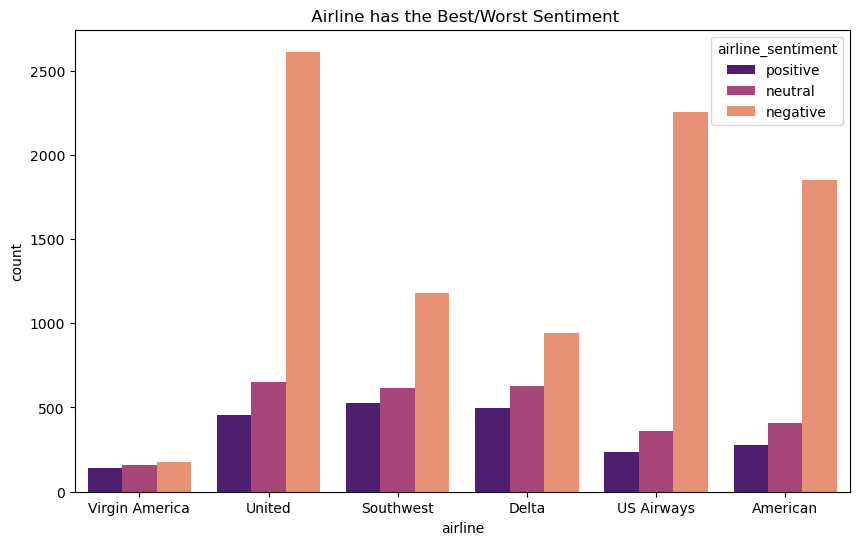

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.countplot(data=df, x='airline', hue='airline_sentiment', palette='magma')
plt.title(' Airline has the Best/Worst Sentiment')
plt.show()

Text(0.5, 1.0, 'Top Reasons for Negative Tweets')

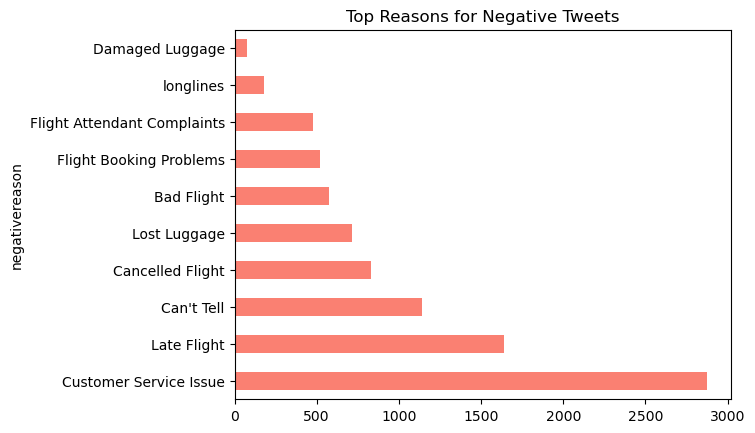

In [18]:
# Plot the top reasons for negative sentiment
df[df['airline_sentiment']=='negative']['negativereason'].value_counts().plot(kind='barh', color='salmon')
plt.title('Top Reasons for Negative Tweets')

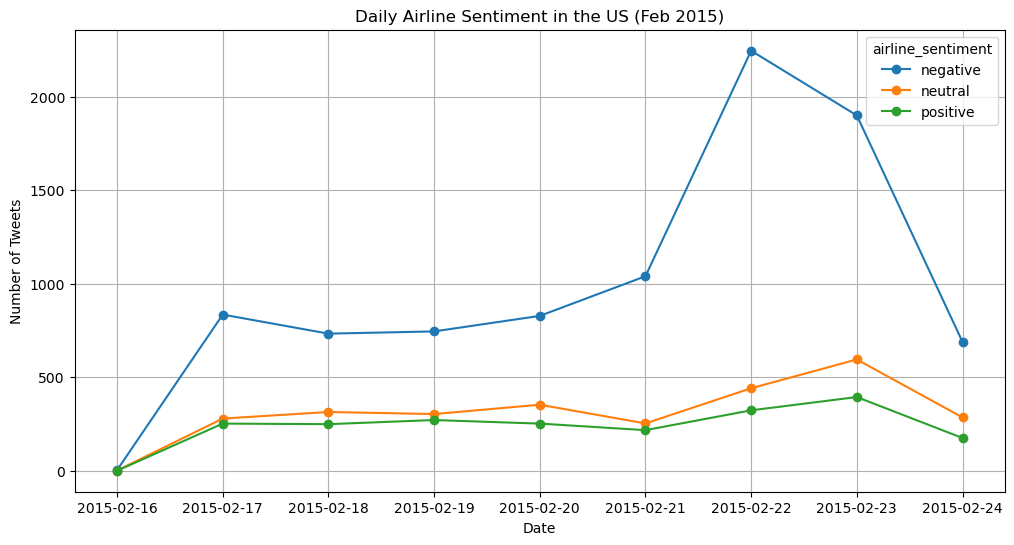

In [22]:
# preparint time column
df['tweet_created'] = pd.to_datetime(df['tweet_created'])
df['date_only'] = df['tweet_created'].dt.date
# Track Sentiment Trends Over Time
daily_sentiment = df.groupby(['date_only', 'airline_sentiment']).size().unstack(fill_value=0)
daily_sentiment.plot(figsize=(12, 6), marker='o')
plt.title('Daily Airline Sentiment in the US (Feb 2015)')
plt.ylabel('Number of Tweets')
plt.xlabel('Date')
plt.grid(True)
plt.show()

In [28]:
#prepare data for model
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
X = df['clean_text'] 
y = df['airline_sentiment'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
vectorizer = TfidfVectorizer(stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

print("Data successfully vectorized!")

Data successfully vectorized!


In [30]:
#comparison mode
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": MultinomialNB(),
    "Random Forest": RandomForestClassifier(n_estimators=100)
}

for name, model in models.items():
    model.fit(X_train_vec, y_train)
    predictions = model.predict(X_test_vec)
    print(f"{name} Accuracy: {accuracy_score(y_test, predictions):.2f}")

Logistic Regression Accuracy: 0.77
Naive Bayes Accuracy: 0.70
Random Forest Accuracy: 0.76


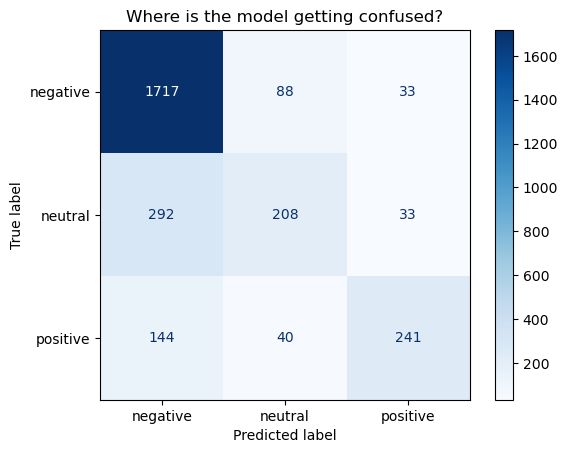

In [32]:
# confussion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, models["Logistic Regression"].predict(X_test_vec))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=models["Logistic Regression"].classes_)
disp.plot(cmap='Blues')
plt.title('Where is the model getting confused?')
plt.show()

In [39]:
feature_names = vectorizer.get_feature_names_out()
coefs = models["Logistic Regression"].coef_[0]
word_importance = pd.DataFrame({'word': feature_names, 'importance': coefs})
print("Top 10 Negative Predictors:")
print(word_importance.sort_values(by='importance', ascending=True).head(10))

Top 10 Negative Predictors:
         word  importance
8467    thank   -3.976626
8472   thanks   -3.615330
673   awesome   -2.311088
3679    great   -2.197970
5014     love   -2.197762
318   amazing   -1.982367
852      best   -1.675528
4679    kudos   -1.620975
9514  worries   -1.496786
3921       hi   -1.479126
